In [1]:
import pandas as pd
import math
import time
import torch

from dataloading import *
from model import *

In [11]:
def train(model, inputs, targets, optimizer, criterion, computing_device):
    model = model.to(computing_device)
    
    model.train()
    
    epoch_loss = 0
    
    for i in range(len(targets)):
        
        src = inputs[i].to(computing_device)
        trg = targets[i].to(computing_device)
        
        optimizer.zero_grad()
        
        outputs = model(src, trg, teacher_forcing_ratio=1.0)
        
        labels = torch.argmax(trg, dim=2) # grab indices for loss function
        
        #targets = [trg sent len, batch size]
        #outputs = [trg sent len, batch size, output dim]
        
        #print('expected')
        #print(src.size())
        #print(labels)
        #print(torch.argmax(outputs, dim=2))
        
        #outputs = outputs[1:].view(-1, outputs.shape[-1]) 
        #labels = labels[1:].view(-1)
        
        outputs = outputs.view(-1, outputs.shape[-1]) 
        labels = labels.view(-1)
        
        outputs = outputs.to(computing_device)
        
        #targets = [(trg sent len - 1) * batch size]- trg should be list of indicies
        #outputs = [(trg sent len - 1) * batch size, output dim]
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        
        #torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        
        epoch_loss += loss.item()
        
    return epoch_loss / len(targets)

def evaluate(model, inputs, targets, optimizer, criterion, computing_device):
    model=model.to(computing_device)
    model.eval()
    
    total_loss=0.0
    
    for i in range(len(targets)):
            src = inputs[i].to(computing_device)
            trg = targets[i].to(computing_device)
            
            print(len(src))
            print(len(trg))

            optimizer.zero_grad()

            outputs = model(src, trg, teacher_forcing_ratio=0.0)
            outputs = outputs.to(computing_device)
            
            loss = criterion(outputs, labels)
            total_loss+=loss

            print('expected')
            print(trg.size())
            print(torch.argmax(trg, dim=2))
            print(torch.argmax(outputs, dim=2))

            #num_labels = interpret_output(trg)
            #num_predictions = interpret_output(outputs)

           

            # shape = [seq_len, batch_size]
            #mse = mean_squared_error(num_labels,num_predictions)
            print('MSE',mse)
            
    #total_mse/=len(targets)
    #print(total_mse)
    #print(len(targets))
    return total_loss/len(targets)

In [6]:
# Check if your system supports CUDA
use_cuda = torch.cuda.is_available()

# Setup GPU optimization if CUDA is supported
if use_cuda:
    computing_device = torch.device("cuda")
    extras = {"num_workers": 1, "pin_memory": True}
    print("CUDA is supported")
else: # Otherwise, train on the CPU
    computing_device = torch.device("cpu")
    extras = False
    print("CUDA NOT supported")
 
computing_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_digits = 10
#OUTPUT_DIM = n_digits + 2
n_chars=256
INPUT_DIM = n_chars+4
OUTPUT_DIM = n_digits + 5
#ENC_EMB_DIM = n_chars+1
#DEC_EMB_DIM = OUTPUT_DIM

HID_DIM = 512
N_LAYERS = 2
ENC_DROPOUT = 0.0
DEC_DROPOUT = 0.0
device=None

enc = Encoder(INPUT_DIM, HID_DIM, N_LAYERS, ENC_DROPOUT)
dec = Decoder(OUTPUT_DIM, HID_DIM, N_LAYERS, DEC_DROPOUT)

model = Seq2Seq(enc, dec)#.to(device)

optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss(ignore_index=output_pad_index)

print('done')

CUDA is supported
done


In [3]:
import os

data_dir = 'data/numerical_data_set_simple_torch'

filenames = []
filenames_by_type = {'A':[], 'B':[], 'C':[], 'D':[], 'E':[]}
for file in os.listdir(data_dir):
    filename, file_extension = os.path.splitext(file)
    
    typ = filename[-1]
    if typ in filenames_by_type:
        filenames.append(file)
        filenames_by_type[typ].append(file)
        
print(len(filenames))
print(filenames_by_type)
for key in filenames_by_type:
    print(len(filenames_by_type[key]))

27
{'A': ['labelled_gen_data1_A', 'labelled_gen_data3_A', 'labelled_gen_data2_A', 'labelled_extr_data1_A', 'labelled_extr_data3_A'], 'B': ['labelled_extr_data19_B', 'labelled_extr_data18_B', 'labelled_gen_data5_B', 'labelled_gen_data4_B', 'labelled_gen_data6_B'], 'C': ['labelled_gen_data10_C', 'labelled_gen_data11_C', 'labelled_gen_data7_C', 'labelled_gen_data8_C', 'labelled_gen_data9_C'], 'D': ['labelled_extr_data2_D', 'labelled_gen_data12_D', 'labelled_gen_data13_D', 'labelled_extr_data4_D'], 'E': ['labelled_extr_data20_E', 'labelled_gen_data16_E', 'labelled_dir_data91_E', 'labelled_gen_data15_E', 'labelled_dir_data92_E', 'labelled_gen_data14_E', 'labelled_dir_data39_E', 'labelled_dir_data49_E']}
5
5
5
4
8


In [10]:


'''
df = pd.DataFrame({'Attribute_value':[], 'Numerical_value':[]})
for filename in filenames_by_type['E'][:-1]:
    print(filename)
    dfE = pd.read_csv(os.path.join(data_dir,filename))
    #dfE[['Attribute_value','Numerical_Value']]
    df = pd.concat([df,dfE[['Attribute_value','Numerical_value']]])
    print(len(df))

                 
#df = pd.read_csv(os.path.join(data_dir,filenames[0])

inputs = df['Attribute_value']
targets = df['Numerical_value']
'''
data_dir = 'data/numerical_data_set_simple_torch'

start=time.time()
filename=filenames_by_type['E'][0]
q = torch.load(os.path.join(data_dir,filename))
inputs,targets = q[0],q[1]

for filename in filenames_by_type['E'][1:]:
    q = torch.load(os.path.join(data_dir,filename))
    src,trg = q[0],q[1]
    print(src.size())
    print(trg.size())
    inputs=torch.cat([inputs,src],dim=1)
    targets=torch.cat([targets,trg],dim=1)
        

BATCH_SIZE=512
n_chunks = math.ceil(inputs.size()[1]/BATCH_SIZE)


#inputs = prepare_data(inputs)
#targets = prepare_targets(targets)
print(time.time()-start)
print('done prepare')

print((inputs).size())
print((targets).size())

#print('input')
#print(inputs[:,0,:])
#print('target')
#print(targets[:,0,:])
#print(torch.argmax(targets, dim=2)[:,0])

start=time.time()
inputs = torch.chunk(inputs, n_chunks, dim=1) 
targets = torch.chunk(targets, n_chunks, dim=1) 

print('done chunking')
print(time.time()-start)
print(BATCH_SIZE)
print(n_chunks)
print(len(inputs))
print((inputs[0].size()))
print((targets[0].size()))

#print((inputs[3].size()))
#print((targets[3].size()))

print('done')



torch.Size([24, 75465, 260])
torch.Size([24, 75465, 15])
torch.Size([24, 7787, 260])
torch.Size([24, 7787, 15])
torch.Size([24, 75465, 260])
torch.Size([24, 75465, 15])
torch.Size([24, 7787, 260])
torch.Size([24, 7787, 15])
torch.Size([24, 75465, 260])
torch.Size([24, 75465, 15])
torch.Size([24, 41544, 260])
torch.Size([24, 41544, 15])
torch.Size([24, 41544, 260])
torch.Size([24, 41544, 15])
18.55167555809021
done prepare
torch.Size([24, 331308, 260])
torch.Size([24, 331308, 15])
done chunking
0.09187698364257812
512
648
648
torch.Size([24, 512, 260])
torch.Size([24, 512, 15])
done


In [12]:
num_epochs = 20
epoch_losses =[]

for epoch in range(num_epochs):
    print('epoch', epoch)
    start=time.time()
    loss = train(model, inputs, targets, optimizer, criterion, computing_device)
    epoch_losses.append(loss)
    print('time',time.time()-start)
    print('loss',loss)

epoch 0
time 395.94718527793884
loss 1.7883344169384168
epoch 1
time 397.3986928462982
loss 1.8470590526675001
epoch 2
time 407.896625995636
loss 1.7315473764398952
epoch 3
time 388.6928918361664
loss 1.4765218209337305
epoch 4
time 390.40739345550537
loss 0.9203645781510406
epoch 5
time 393.8921866416931
loss 0.5513821186750759
epoch 6
time 394.3046269416809
loss 0.429654762516787
epoch 7
time 390.69056367874146
loss 0.3873074577638396
epoch 8
time 394.3005497455597
loss 0.3724944071361312
epoch 9


KeyboardInterrupt: 

In [18]:
PATH = "./output/typeE_9.pt"
torch.save(model.state_dict(), PATH)

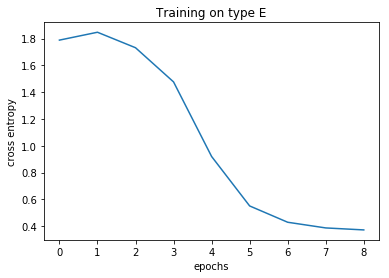

In [17]:
from matplotlib import pyplot as plt


y = [1.7883344169384168,1.8470590526675001,1.7315473764398952,1.4765218209337305,0.9203645781510406,0.5513821186750759,0.429654762516787,0.3873074577638396,0.3724944071361312]
x = list(range(len(y)))

plt.plot(x,y)
plt.xlabel('epochs')
plt.ylabel('cross entropy')
plt.title('Training on type E')
plt.show()